In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter
#Loads necessary libraries for:
#Data manipulation (pandas)
#Plotting (matplotlib, seaborn)
#Text cleaning and analysis (re, Counter, WordCloud)

In [2]:
# Load dataset
df = pd.read_csv("imdb_tvshows.csv")

# Drop unnecessary index column
df.drop(columns=["Unnamed: 0"], inplace=True)

# Drop rows with missing reviews
df.dropna(subset=["Review"], inplace=True)

# View structure
print(df.head())
print(df.info())


   Rating (out of 10)                                             Review  \
0                   9  Andor was every bit as good as I was hoping fo...   
1                  10  Wow. I just finished episode 12 of the first s...   
2                  10  Andor Season 2 is the best Star Wars Show ever...   
3                   9  There were a few episodes I didn't like in bot...   
4                   9  Didnt like the new movies and even Mandalorian...   

     Show ID   Review ID  
0  tt9253284  rw10514299  
1  tt9253284   rw8690571  
2  tt9253284  rw10514285  
3  tt9253284  rw10514788  
4  tt9253284   rw8665236  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8319 entries, 0 to 8318
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Rating (out of 10)  8319 non-null   int64 
 1   Review              8319 non-null   object
 2   Show ID             8319 non-null   object
 3   Review ID           8319 non-n

In [3]:
# Stopword list
offline_stopwords = {
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves",
    "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are",
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an",
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
    "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up",
    "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when",
    "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no",
    "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don",
    "should", "now"
}

# Cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in offline_stopwords and len(word) > 2]
    return " ".join(words)

# Sample for analysis
df_sample = df.sample(n=1000, random_state=42).copy()

# Apply cleaning
df_sample['cleaned_review'] = df_sample['Review'].apply(clean_text)
df_sample['review_length'] = df_sample['cleaned_review'].apply(lambda x: len(x.split()))


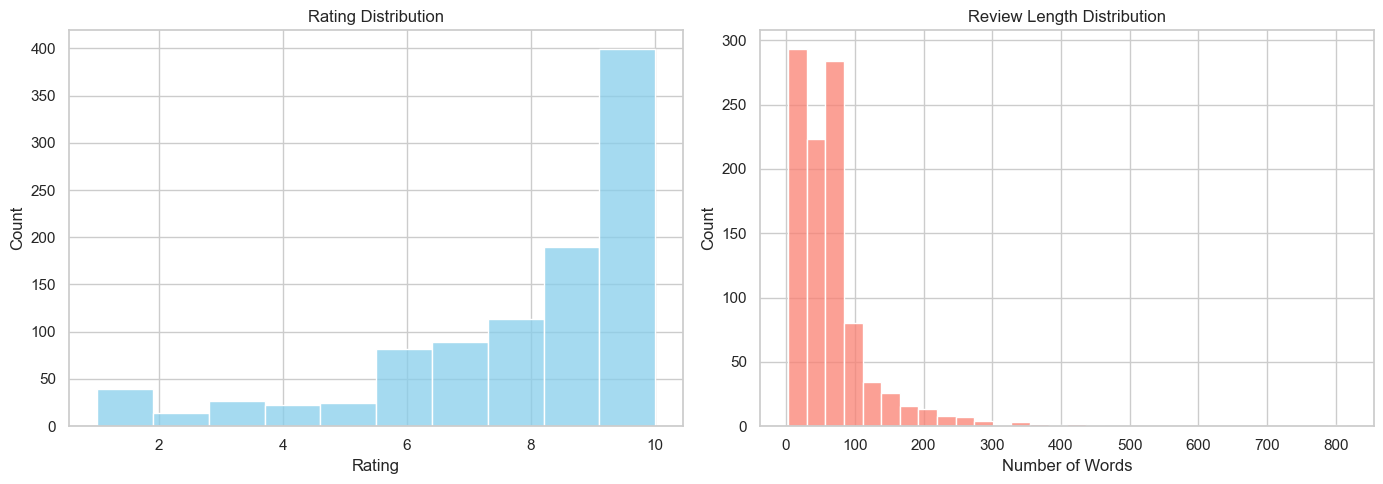

In [4]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Rating distribution
sns.histplot(df_sample["Rating (out of 10)"], bins=10, ax=axes[0], color='skyblue')
axes[0].set_title("Rating Distribution")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Count")

# Review length
sns.histplot(df_sample["review_length"], bins=30, ax=axes[1], color='salmon')
axes[1].set_title("Review Length Distribution")
axes[1].set_xlabel("Number of Words")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


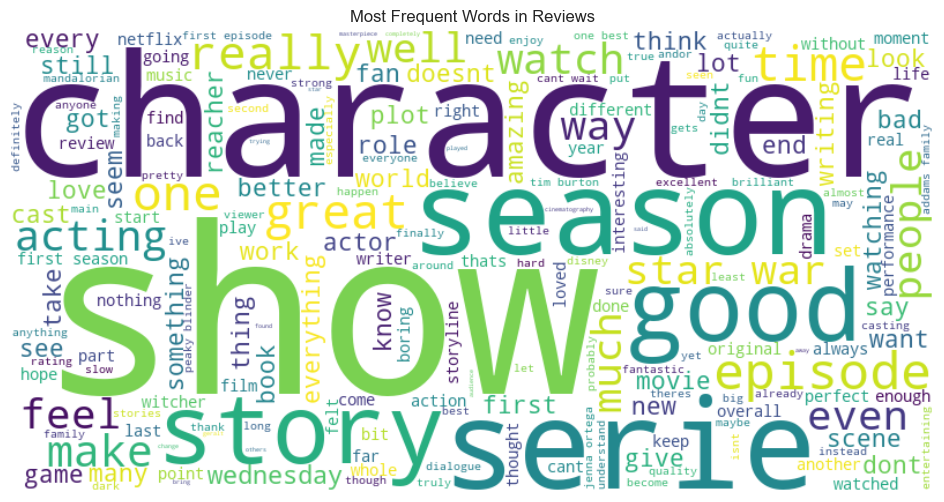

In [5]:
# Combine all cleaned reviews
all_words = " ".join(df_sample['cleaned_review'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Reviews")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_5420\4266214656.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


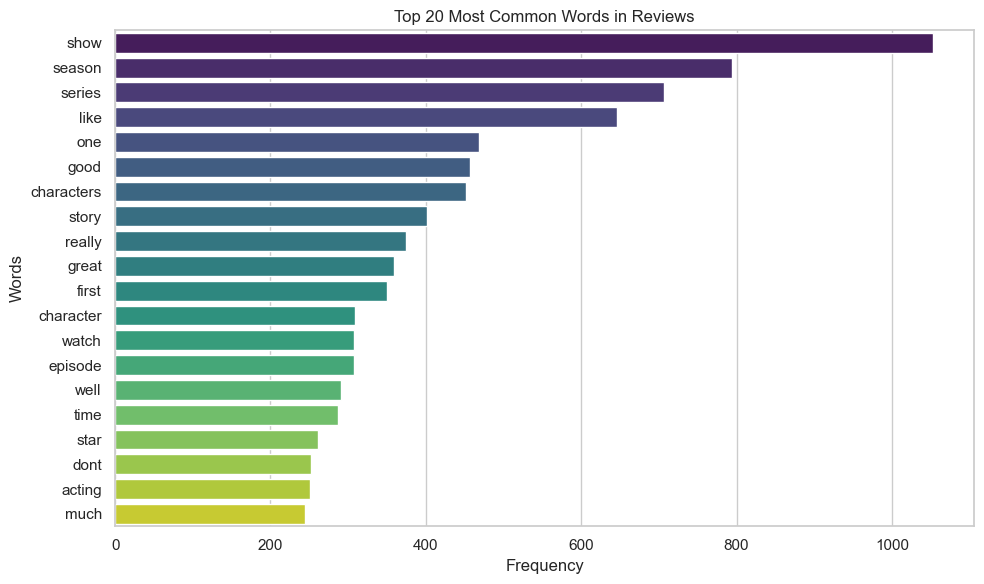

In [6]:
# Count word frequency
word_list = all_words.split()
word_freq = Counter(word_list).most_common(20)

# Bar plot
words, counts = zip(*word_freq)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title("Top 20 Most Common Words in Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()


In [7]:
print("🔍 BASIC INSIGHTS")
print("-" * 60)
print(f"Average Rating: {df_sample['Rating (out of 10)'].mean():.2f}")
print(f"Average Review Length (words): {df_sample['review_length'].mean():.2f}")
print(f"Most Common Words: {', '.join([word for word, _ in word_freq[:5]])}")
print(f"Longest Review (words): {df_sample['review_length'].max()} words")
print(f"Shortest Review (words): {df_sample['review_length'].min()} words")


🔍 BASIC INSIGHTS
------------------------------------------------------------
Average Rating: 8.08
Average Review Length (words): 65.81
Most Common Words: show, season, series, like, one
Longest Review (words): 815 words
Shortest Review (words): 3 words


In [8]:
# Add sentiment labels
df_sample['sentiment'] = df_sample['Rating (out of 10)'].apply(lambda x: 1 if x >= 7 else 0)

# Check label distribution
print(df_sample['sentiment'].value_counts())


sentiment
1    791
0    209
Name: count, dtype: int64


In [22]:
# Separate classes
positive = df_sample[df_sample['sentiment'] == 1]
negative = df_sample[df_sample['sentiment'] == 0]

# Balance classes by undersampling positives
balanced_df = pd.concat([
    positive.sample(len(negative), random_state=42),
    negative
])

# Shuffle dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Preview
print(balanced_df['sentiment'].value_counts())



sentiment
0    209
1    209
Name: count, dtype: int64


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(balanced_df['cleaned_review'])
y = balanced_df['sentiment']


In [24]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
X_train_dense = X_train.toarray()  # or .todense()
X_test_dense = X_test.toarray()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dense)
X_test_scaled = scaler.transform(X_test_dense)


In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(f"RF Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))


RF Accuracy: 0.5000
              precision    recall  f1-score   support

           0       0.51      0.53      0.52        43
           1       0.49      0.46      0.47        41

    accuracy                           0.50        84
   macro avg       0.50      0.50      0.50        84
weighted avg       0.50      0.50      0.50        84



In [28]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)  # SVM benefits from scaling
y_pred_svm = svm.predict(X_test_scaled)

print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.4524
              precision    recall  f1-score   support

           0       0.47      0.56      0.51        43
           1       0.42      0.34      0.38        41

    accuracy                           0.45        84
   macro avg       0.45      0.45      0.44        84
weighted avg       0.45      0.45      0.45        84



In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"Cross-validated accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Cross-validated accuracy: 0.5809 ± 0.0459
